In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [484]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [410]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [488]:


# حذف سطرهایی که مقدار Address گمشده دارند
df = df.dropna(subset=['Address'])

# تبدیل ستون Area به عدد (float)
def clean_area(x):
    try:
        return float(x)
    except:
        return np.nan

df['Area'] = df['Area'].apply(clean_area)

# حذف سطرهایی که Area مقدار NaN دارند یا خیلی بزرگ هستند
df = df.dropna(subset=['Area'])
df = df[df['Area'] < 10000]  # این عدد می‌تواند بر اساس دامنه منطقی تغییر کند

# نمایش اطلاعات پس از پیش‌پردازش
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB
None
    Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63.0     1     True       True      True         Shahran  1.850000e+09   
1   60.0     1     True       True      True         Shahran  1.850000e+09   
2   79.0     2     True       True      True          Pardis  5.500000e+08   
3   95.0     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123.0     2     Tr

In [414]:
# فرض کنیم df همون دیتافریم پاکسازی شده‌ات باشه

# استفاده از pandas برای One-Hot Encoding ستون Address
# d = pd.get_dummies(df, columns=['Address'], drop_first=True)



# نمایش چند سطر اول برای بررسی
print(df.head())

    Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63.0     1     True       True      True         Shahran  1.850000e+09   
1   60.0     1     True       True      True         Shahran  1.850000e+09   
2   79.0     2     True       True      True          Pardis  5.500000e+08   
3   95.0     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123.0     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


In [416]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [418]:
# میانگین قیمت هر آدرس
mean_price_by_address = df.groupby('Address')['Price(USD)'].mean()

# مرتب‌سازی و تقسیم‌بندی
sorted_addresses = mean_price_by_address.sort_values()

# تقسیم به 3 بخش: ارزان، متوسط، گران
n = len(sorted_addresses)
cheap = sorted_addresses[:n//3].index
mid = sorted_addresses[n//3:2*n//3].index
expensive = sorted_addresses[2*n//3:].index

# تابع برای تخصیص دسته‌بندی
def categorize_address(addr):
    if addr in cheap:
        return 'Low'
    elif addr in mid:
        return 'Mid'
    elif addr in expensive:
        return 'High'
    else:
        return 'Other'

df['Region'] = df['Address'].apply(categorize_address)

df = pd.get_dummies(df, columns=['Region'], drop_first=True)
df[['Region_Low', 'Region_Mid']] = df[['Region_Low', 'Region_Mid']].astype('int8')

df = df.drop(columns=['Address'])




In [420]:
bool_cols = ['Parking', 'Warehouse', 'Elevator']
df[bool_cols] = df[bool_cols].astype('int8')


In [422]:
# df = df.astype({col: 'int8' for col in df.columns if col.startswith('Address_')})


In [424]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price',
       'Price(USD)', 'Region_Low', 'Region_Mid'],
      dtype='object')

In [426]:
np.sum(df.isnull())

C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Price         0
Price(USD)    0
Region_Low    0
Region_Mid    0
dtype: int64

In [428]:
# تبدیل ستون‌های مربوط به آدرس (Address_*) از بولی به عدد 0 و 1
# df = df.astype({col: 'int8' for col in df.columns if col.startswith('Address_')})

# پیدا کردن همه ستون‌های بولی باقی‌مانده (مثل Parking, Warehouse, Elevator)
bool_cols = df.select_dtypes(include=['bool']).columns

# تبدیل این ستون‌های بولی به عددی (0 و 1)
df[bool_cols] = df[bool_cols].astype('int8')

# بررسی نتیجه
print(df[bool_cols].dtypes)
print(df.head())


Series([], dtype: object)
    Area  Room  Parking  Warehouse  Elevator         Price  Price(USD)  \
0   63.0     1        1          1         1  1.850000e+09    61666.67   
1   60.0     1        1          1         1  1.850000e+09    61666.67   
2   79.0     2        1          1         1  5.500000e+08    18333.33   
3   95.0     2        1          1         1  9.025000e+08    30083.33   
4  123.0     2        1          1         1  7.000000e+09   233333.33   

   Region_Low  Region_Mid  
0           0           1  
1           0           1  
2           1           0  
3           1           0  
4           0           0  


In [430]:
np.sum(df.duplicated())

367

In [432]:
df = df.drop_duplicates()
print(f'تعداد سطرها بعد از حذف تکراری‌ها: {len(df)}')


تعداد سطرها بعد از حذف تکراری‌ها: 3083


In [434]:
df['Price'].mean()

5434674343.201752

In [436]:
df['Price'].std()

8350902412.682627

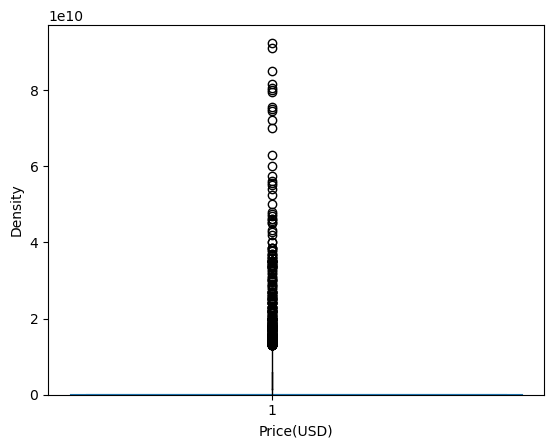

In [438]:
plt.boxplot(df['Price'])
plt.show()

In [440]:
print(df['Price'].median())


2900000000.0


In [442]:
# محاسبه چارک‌ها و IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# تعریف بازه مجاز بدون داده‌های پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# حذف داده‌های پرت از دیتافریم
df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)].copy()

print(f'تعداد نمونه‌ها قبل از حذف پرت: {len(df)}')
print(f'تعداد نمونه‌ها بعد از حذف پرت: {len(df_clean)}')
print(f'میانگین جدید قیمت‌ها: {df_clean["Price"].mean()}')
print(f'میانه جدید قیمت‌ها: {df_clean["Price"].median()}')


تعداد نمونه‌ها قبل از حذف پرت: 3083
تعداد نمونه‌ها بعد از حذف پرت: 2801
میانگین جدید قیمت‌ها: 3425900392.7483044
میانه جدید قیمت‌ها: 2500000000.0


In [444]:
print(df_clean['Price'].mean())


3425900392.7483044


In [446]:
print(df_clean['Price'].std())

2865163340.243575


In [448]:
print(df_clean['Price'].median())

2500000000.0


In [450]:
X = df.drop(['Price', 'Price(USD)'], axis=1)  # حذف ستون‌های قیمت، بقیه ستون‌ها می‌مونه
y = df['Price(USD)']  # ستون قیمت به دلار به عنوان هدف



In [452]:
# Train Test Split


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [454]:
# Standardize



from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [456]:
col=X.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col)
X_train_scaled




,Area,Room,Parking,Warehouse,Elevator,Region_Low,Region_Mid
0,-0.326498,-0.118959,0.437454,0.317168,0.524569,-0.522892,-0.954004
1,-0.558441,-0.118959,0.437454,0.317168,0.524569,-0.522892,1.048213
2,-0.872247,-1.420464,0.437454,-3.152908,0.524569,-0.522892,1.048213
3,-0.067267,-0.118959,0.437454,0.317168,0.524569,-0.522892,-0.954004
4,0.191964,1.182547,0.437454,0.317168,0.524569,-0.522892,-0.954004
...,...,...,...,...,...,...,...
1844,0.178320,1.182547,0.437454,0.317168,0.524569,1.912441,-0.954004
1845,0.069171,-0.118959,0.437454,0.317168,0.524569,-0.522892,-0.954004
1846,-0.053623,-0.118959,0.437454,-3.152908,0.524569,-0.522892,1.048213
1847,1.228887,1.182547,0.437454,0.317168,0.524569,-0.522892,-0.954004


In [458]:
X_test_scaled=sc.transform(X_test)
col=X.columns
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col)
X_test_scaled

,Area,Room,Parking,Warehouse,Elevator,Region_Low,Region_Mid
0,-0.694878,-1.420464,0.437454,0.317168,0.524569,-0.522892,1.048213
1,-0.544797,-0.118959,-2.285955,-3.152908,0.524569,-0.522892,1.048213
2,0.342045,1.182547,0.437454,0.317168,0.524569,-0.522892,-0.954004
3,-0.299210,-0.118959,0.437454,0.317168,0.524569,1.912441,-0.954004
4,0.710426,1.182547,0.437454,0.317168,0.524569,-0.522892,-0.954004
...,...,...,...,...,...,...,...
1229,-0.217348,-0.118959,0.437454,0.317168,0.524569,-0.522892,1.048213
1230,-0.449291,-0.118959,0.437454,0.317168,0.524569,-0.522892,-0.954004
1231,0.110102,-0.118959,0.437454,0.317168,0.524569,-0.522892,1.048213
1232,-0.490222,-0.118959,0.437454,0.317168,0.524569,1.912441,-0.954004


In [460]:
X_train= X_train_scaled
X_test= X_test_scaled

In [462]:



from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)


LinearRegression()

In [464]:
# Find Model Coefficients
# print the intercept(b0)
print(lm.intercept_)

178560.40120605731


In [466]:
# print the coefficients(b1, b2, ...)
print(lm.coef_)

[155934.58229732  22445.18841523 -10600.53923161   9341.11651918
   7777.56939322 -83156.75937747 -75860.56304341]


In [468]:
predictions = lm.predict(X_test_scaled)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))


MAE: 88288.71146372631
MSE: 38399077937.21082
RMSE: 195956.8267175472
R2: 0.5410934882429007


In [471]:
# Residual Histogram

residual= y_test-predictions
sns.histplot(residual, bins=50, kde=True)

<Axes: xlabel='Price(USD)', ylabel='Count'>

In [473]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', np.sqrt(metrics.r2_score(y_test, predictions)))


MAE: 88288.71146372631
MSE: 38399077937.21082
RMSE: 195956.8267175472
R2: 0.7355905710671533


In [490]:
# دسته‌بندی آدرس‌ها به 3 منطقه براساس میانگین قیمت دلار
mean_price_by_address = df_clean.groupby('Address')['Price(USD)'].mean()
sorted_addresses = mean_price_by_address.sort_values()
n = len(sorted_addresses)
cheap = sorted_addresses[:n//3].index
mid = sorted_addresses[n//3:2*n//3].index
expensive = sorted_addresses[2*n//3:].index

def categorize_address(addr):
    if addr in cheap:
        return 'Low'
    elif addr in mid:
        return 'Mid'
    elif addr in expensive:
        return 'High'
    else:
        return 'Other'

df_clean['Region'] = df_clean['Address'].apply(categorize_address)

# ایجاد Dummy Variable برای Region و حذف ستون Address
df_clean = pd.get_dummies(df_clean, columns=['Region'], drop_first=True)
df_clean = df_clean.drop(columns=['Address'])

# تبدیل بولی‌ها به عددی
bool_cols = ['Parking', 'Warehouse', 'Elevator']
df_clean[bool_cols] = df_clean[bool_cols].astype('int8')

# آماده‌سازی X و y
X = df_clean.drop(['Price', 'Price(USD)'], axis=1)
y = df_clean['Price(USD)']

# تقسیم داده
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# استانداردسازی
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X.columns)

# مدل‌سازی
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# پیش‌بینی و ارزیابی
predictions = lm.predict(X_test_scaled)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

# ترسیم نمودار باقی‌مانده‌ها
import seaborn as sns
import matplotlib.pyplot as plt
residual = y_test - predictions
sns.histplot(residual, bins=50, kde=True)
plt.show()


KeyError: 'Address'